# Анализ бизнес-показателей Яндекс.Афиша

## Описание проекта

В данном проекте мы рассмотрим данные предоставленные отделом маркетинговой аналитики Яндекс.Афиши.  
- Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
 - лог сервера с данными о посещениях сайта Яндекс.Афиши
 - выгрузка всех заказов за этот период
 - статистика рекламных расходов  
- Необходимо изучить:
 - как клиенты пользуются сервисом
 - когда делают первые покупки на сайте
 - сколько денег приносит компании каждый клиент
 - когда расходы на привлечение клиента окупаются  

Наша задача определить источники трафика, каким типом устроиств пользуются наши посетители, определим самые перспективные кагорты.  
Глобальная задача проанализировать метрики и определить невыгодные источники трафика, для того чтобы перераспределить бюджет.

### План работы

[1. Чтение фаилов и предобработка данных](#1-bullet)
   - [1.1. Данные по визитам](#1.1-bullet)
   - [1.2. Данные по заказам](#1.2-bullet)
   - [1.3. Данные по расходам](#1.3-bullet)  
   
[2. Расчет метрик и построение графиков](#2-bullet)
   - [2.1. Продуктовые метрики](#2.1-bullet) 
    - [2.1.1. Расчет DAU, WAU и MAU](#2.1.1-bullet)
    - [2.1.2. Расчет частоты визитов на сайт](#2.1.2-bullet) 
    - [2.1.3. Расчет продолжительности пользовательской сессии](#2.1.3-bullet)
    - [2.1.4. Расчет Retention Rate](#2.1.4-bullet)
    - [Выводы по продуктовым метрикам](#2.1.5-bullet)
   - [2.2. Метрики электронной коммерции](#2.2-bullet)
    - [2.2.1. Расчет времени от первого захода на сайт до совершения покупки](#2.2.1-bullet)
    - [2.2.2. Когортный анализ. Расчет количества покупок за определенный период](#2.2.2-bullet)
    - [2.2.3. Расчет средней выручки с пользователя](#2.2.3-bullet) 
    - [2.2.4. Расчет изменения во времени LTV по когортам](#2.2.4-bullet) 
    - [Выводы по метрикам электронной коммерции](#2.2.5-bullet) 
   - [2.3. Маркетинговые метрики](#2.3-bullet)
    - [2.3.1. Расчет затрат на маркетинг](#2.3.1-bullet)
    - [2.3.2. Расчет CAC](#2.3.2-bullet)
    - [2.3.3. Расчет ROMI](#2.3.3-bullet) 
    - [Выводы по маркетинговым метрикам](#2.3.4-bullet) 
    
[3. Выводы и рекомендации](#3-bullet)

<a id='1-bullet'></a>

### 1. Чтение фаилов и предобработка данных

Импортируем библиотеки

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

<a id='1.1-bullet'></a>

#### 1.1. Данные по визитам 
Прочитаем фаил с визитами на сайт и изучим информацию по нему

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


Приведем названия столбцов к нижнему регистру

In [3]:
visits = visits.rename(columns={'Device':'device', 'End Ts':'end ts', 'Source Id':'source_id', 'Start Ts':'start ts', 'Uid':'uid'})
visits.head(10)                               

,device,end ts,source_id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end ts       359400 non-null object
source_id    359400 non-null int64
start ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


В столбцах End Ts и Start Ts - даты первого входа и последнего тип данных object.  
 Приведем сразу к типу данных даты

In [5]:
visits['end ts'] = pd.to_datetime(visits['end ts'])
visits['start ts'] = pd.to_datetime(visits['start ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [6]:
visits.duplicated().sum()

0

Проверили дубликаты. дубликатов нет

In [7]:
visits.isnull().sum()

device       0
end ts       0
source_id    0
start ts     0
uid          0
dtype: int64

Проверили пропуски. Пропусков нет.

Вывод по фаилу с визитами:
1. Получили данные по уникальному пользователю, началу его сессии и окончанию, id источника трафика и по типу устройства пользователя
2. Имеем данные  в объеме 359400
3. Данные без дубликатов и пропусков
4. Заменили тип данных на верный в столбцах с датой
5. Для дальнейшего удобства привели наименования столбцов к нижнему регистру
6. По первому взгляду заметно, что сервисом чаще пользуются со стационарных устройств, нежели чем со смартфонов

<a id='1.2-bullet'></a>

#### 1.2. Данные по заказам
Прочитаем фаил с заказами на сайте и изучим информацию по нему

In [8]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


Приведем названия столбцом к нижнему регистру 

In [9]:
orders = orders.rename(columns={'Buy Ts':'buy ts', 'Revenue':'revenue', 'Uid':'uid'})
orders.head(10)

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


По столбцу buy ts  зафисирована дата покупки.  
 Заменим тип данных с object на дату

In [11]:
orders['buy ts'] = pd.to_datetime(orders['buy ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:
orders.duplicated().sum()

0

Проверили на дубликаты. Дубликатов нет

In [13]:
orders.isnull().sum()

buy ts     0
revenue    0
uid        0
dtype: int64

Проверили на пропуски. Пропусков нет.

Вывод по фаилу с заказами:
1. В данных зафиксирована дата покупки, выручка и уникальный id покупателя
2. Имеем данные с объемом 50415 строк 
3. дубликатов и пропусков в данных нет
4. Заменили тип данных на верный в столбце с датой
5. привели наименования столбцов к нижнему регистру
6. На первый взгляд покупки на сервисе сильно разняться в стоимости, так как есть покупка на 17 у.е и есть на 0,18 у.е.

<a id='1.3-bullet'></a>

#### 1.3. Данные по расходам
Прочитаем фаил с затратами и изучим информацию по нему

In [14]:
costs = pd.read_csv('/datasets/costs.csv')
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Столбец dt приведем к типу данных даты, так как в нем зафиксирована дата расхода,  
 а сейчас это значение имеет тип данных object

In [16]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [17]:
costs.duplicated().sum()

0

Проверили дубликаты - их нет

In [18]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

Проверили пропуски - их нет

Выводы по таблице с расходами:
1. Из таблицы мы видим id ресурса , на котрый пошли затраты, дату и сумму расхода
2. 2542 строчки в данной таблице
3. Дубликатов нет, пропусков нет
4. Заменили тип данных. Привели дату к типу данных datetime64

<a id='2-bullet'></a>

### 2. Расчет метрик и построение графиков

<a id='2.1-bullet'></a>

#### 2.1. Продуктовые метрики

<a id='2.1.1-bullet'></a>

##### 2.1.1. Расчет DAU, WAU и MAU

Для расчетов активности на дату, неделю, месяц  
 добавим новые столбцы (год, месяц и неделю, а также для полной даты) в нашу таблицу с визитами

In [19]:
visits['activity_year'] = visits['start ts'].dt.year
visits['activity_month'] = visits['start ts'].dt.month
visits['activity_week'] = visits['start ts'].dt.week
visits['activity_date'] = visits['start ts'].dt.date
visits.head(10)

,device,end ts,source_id,start ts,uid,activity_year,activity_month,activity_week,activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,5,2018-01-30
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,11,44,2017-11-05
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017,7,29,2017-07-19
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017,11,45,2017-11-08


Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее

In [20]:
mau_total = visits.groupby('activity_month').agg({'uid': 'nunique'}).mean()
dau_total = visits.groupby('activity_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['activity_year', 'activity_week']).agg({'uid': 'nunique'}).mean()


In [21]:
print(int(mau_total))
print(int(dau_total))
print(int(wau_total))


23228
907
5716


Видим, что поток заказов в неделю весьма интенсивный, а значения дневной автивности весьма высокое.  
 Думаю это связано с тем, что билеты на мероприятия покупаются к выходным например во вторник или в среду,  
  а не планируются на месяц в перед.  
 Посмотрим так же регулярность использования сервиса 

In [22]:
sticky_mau = dau_total / mau_total *100
sticky_wau = dau_total / wau_total * 100
print(int(sticky_mau))
print(int(sticky_wau))

3
15


Эти показатели подтверждают мою теорию о том, что событие планируется и совершается в рамках недели:  
 показатель регулярности пользования сервисом в неделю в 5 раз выше, чем это же показатель в разрезе месяца.

Посмотрим теперь на графиках как изменяются наши метрики во времени.  

Построим график и посмотрим уникальных посетителей сайта на определенные даты (DAU)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


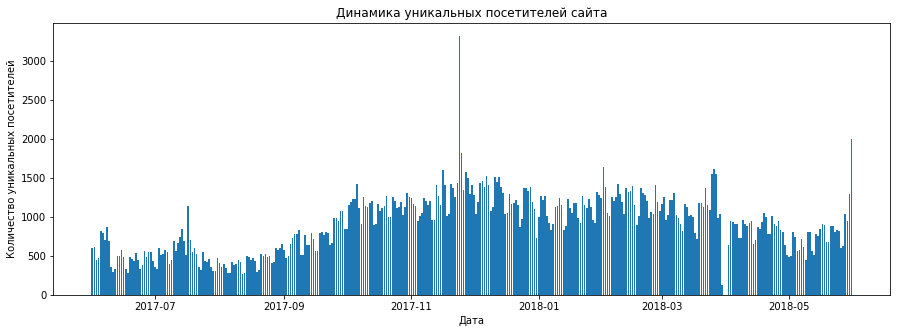

In [23]:
dau = visits.groupby('activity_date').agg({'uid': 'nunique'}).reset_index()
plt.figure(figsize =(15,5))
plt.bar(dau['activity_date'], dau['uid'])

plt.ylabel('Количество уникальных посетителей')
plt.xlabel('Дата')
#plt.xticks(rotation=45)
plt.title('Динамика уникальных посетителей сайта');

И по графику видно , что активно ведется не каждый день.  
 Есть пиковое значение - примерно конец ноября - начало декабря - видимо начинают бронировать билеты на новогодние мероприятия

Построим график и посмотрим уникальных посетителей сайта по неделям  (WAU)

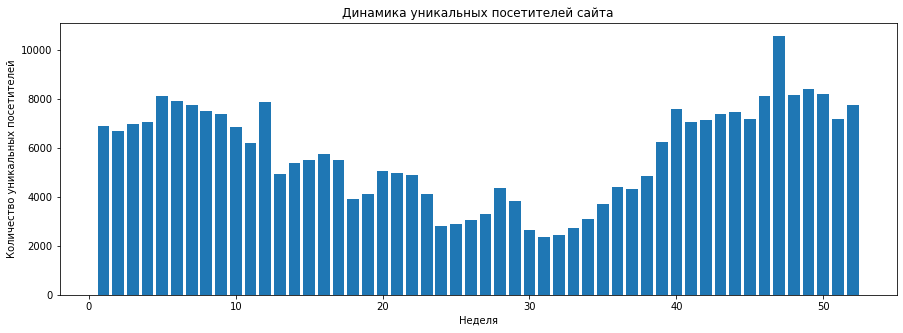

In [24]:
wau = visits.groupby(['activity_year', 'activity_week']).agg({'uid': 'nunique'}).reset_index()
plt.figure(figsize =(15,5))
plt.bar(wau['activity_week'], wau['uid'])

plt.ylabel('Количество уникальных посетителей')
plt.xlabel('Неделя')
#plt.xticks(rotation=45)
plt.title('Динамика уникальных посетителей сайта');

Наглядно видим, что в конце ноября начале декабря действительно спрос на мероприятия повышается.  
 Самый низкий спрос - это летние месяцы и тут все логично: отпуска +  
 в большей части нашей страны тепло - редкость, и поэтому люди охотнее проведут время на природе.  
  Есть всплески спроса и в летние месяцы - предположу, что это летние  open-air мероприятия (музыкальные фестивали).  
   К тому же с началом учебного года (сентябрь) школьникам и студентам утсраивают культурный досуг с посещениями музеев/выставок/театров. Осенью в прокате кино появляются громкие премьеры.  
    Вот и видим на графике, что спрос начинает расти с приходом осени - тут уже все хотят спрятаться в тепле.

Построим график и посмотрим уникальных посетителей сайта в разрезе месяцев (MAU)

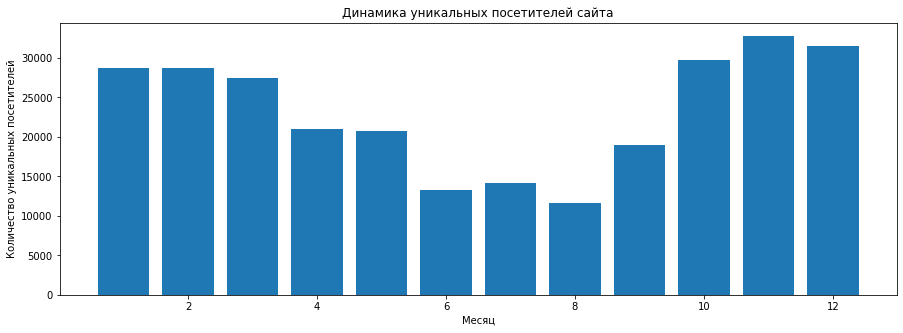

In [25]:
mau = visits.groupby('activity_month').agg({'uid': 'nunique'}).reset_index()
plt.figure(figsize =(15,5))
plt.bar(mau['activity_month'], mau['uid'])

plt.ylabel('Количество уникальных посетителей')
plt.xlabel('Месяц')
#plt.xticks(rotation=45)
plt.title('Динамика уникальных посетителей сайта');

По этому графику убеждаемся, что спрос на мероприятия велик в прохладную погоду,  
 а с наступлением тепла посетителей становится меньше.

<a id='2.1.2-bullet'></a>

##### 2.1.2. Расчет частоты визитов на сайт

Определим сколько раз за день пользователи в среднем заходят на сайт.  
 Для этого добавим новый столбец и запишем туда результат отношения количества посетителей и количества визитов.

In [26]:
pivot_d = visits.pivot_table(index = 'activity_date', values= 'uid', aggfunc= {'count', 'nunique'}).reset_index()
pivot_d.columns = ['visit_date', 'n_visits', 'n_users']
pivot_d['visits_per_user'] = pivot_d['n_visits'] / pivot_d['n_users']
pivot_d.head(10)

,visit_date,n_visits,n_users,visits_per_user
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024
5,2017-06-06,875,797,1.097867
6,2017-06-07,788,699,1.127325
7,2017-06-08,939,868,1.081797
8,2017-06-09,755,695,1.086331
9,2017-06-10,375,350,1.071429


Видим, что в среднем пользователи заходят на сайт не менее 1-го раза, что логично -  
 зашли -> посмотрели -> согласовались с друзьями/девушкой/родителями -> вернулись на сайт и купили билеты

Построим график и посмотрим наглядно.

<function matplotlib.pyplot.show(*args, **kw)>

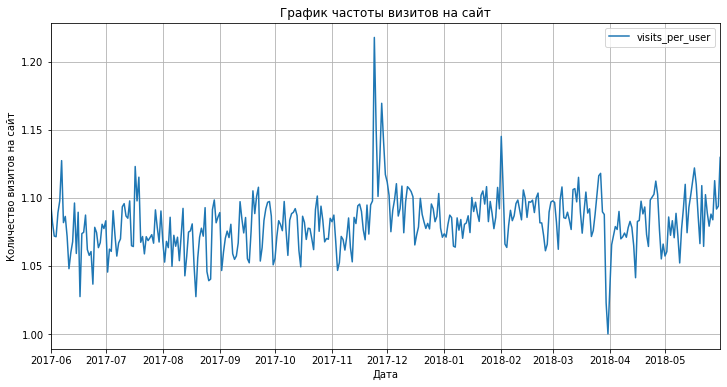

In [27]:
pivot_d.plot(x='visit_date', y='visits_per_user', style='-',grid=True, figsize=(12, 6));  
plt.title('График частоты визитов на сайт')
plt.xlabel('Дата')
plt.ylabel('Количество визитов на сайт');
plt.show

Здесь наблюдаем, что в среднем 1,1 раз посетитель приходит сайт за день. И снова видим всплеск в декабре -  
 возможно была охота на скидки. Точно ! Черная пятница же - последняя пятница ноября, все ловят скидки!

<a id='2.1.3-bullet'></a>

##### 2.1.3. Расчет продолжительности пользовательской сессии

In [28]:
visits['session_duration_sec'] = (visits['end ts'] - visits['start ts']).dt.seconds
visits['session_duration_sec'].mean()

643.506488592098

Имеем среднюю продолжительность нахождения пользователя на сервисе 643,5 секунды.  
 Для чистоты проверки посмотрим наиболее частую продолжительность - найдем моду

In [29]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

Итого видим, что пользователи на сайте чаще задерживаются лишь на 1 минуту

Посмотрим наглядно на этот вывод - постоим гистограмму распределения

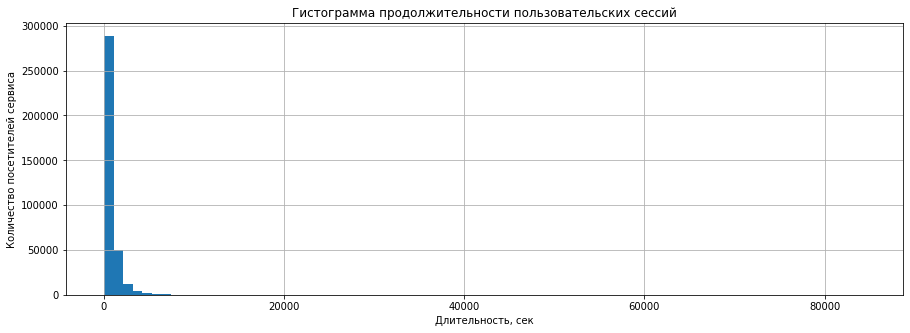

In [30]:
plt.figure(figsize =(15,5))
visits['session_duration_sec'].hist(bins=80) 
plt.title('Гистограмма продолжительности пользовательских сессий')
plt.xlabel('Длительность, сек')
plt.ylabel('Количество посетителей сервиса');

Наглядно можем увидеть, что значении продолжительности сессии очень мало -  
 о чем это может говорить :  
    1. Сервис работает безупречно и нет проблем с задержками по ответам банка при оплате на сервисе
    2. К тому же сервис адаптирован для быстрой оплаты , не перегружен рекламой и баннерами, что позволяет быстрее его загружать в браузере
    3. А не похоже ли это на "скликивание" ? Уберем нулевые сессии и посмотрим на результат

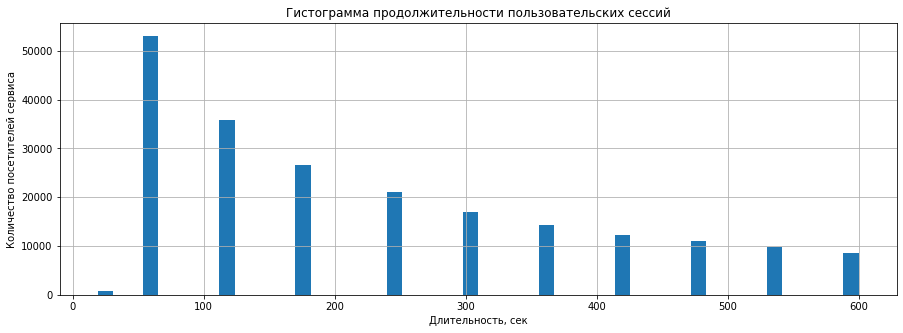

In [31]:
plt.figure(figsize =(15,5))
visits.query('session_duration_sec != 0 & session_duration_sec < 643')['session_duration_sec'].hist(bins=50) 
plt.title('Гистограмма продолжительности пользовательских сессий')
plt.xlabel('Длительность, сек')
plt.ylabel('Количество посетителей сервиса');

Видим, что чаще всего сессии продолжительность 60 сек.

In [32]:
visits.query('session_duration_sec != 0').count()

device                  323606
end ts                  323606
source_id               323606
start ts                323606
uid                     323606
activity_year           323606
activity_month          323606
activity_week           323606
activity_date           323606
session_duration_sec    323606
dtype: int64

Видим так же , что у нас примерно 11% нулевых сессии - вроде не так много.

<a id='2.1.4-bullet'></a>

##### 2.1.4. Расчет Retention Rate

Создадим таблицу с датами первых визитов и присоединим ее нашей рабочей visits

In [33]:
first_visit = visits.groupby('uid')['start ts'].min()
first_visit.name = 'first_visit'
visits = visits.join(first_visit, on='uid')
visits.head()

,device,end ts,source_id,start ts,uid,activity_year,activity_month,activity_week,activity_date,session_duration_sec,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00


Получим месяц первого визита и месяц начала заказов

In [34]:
visits['visit_month'] = visits['start ts'].astype('datetime64[M]')
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits.head()

,device,end ts,source_id,start ts,uid,activity_year,activity_month,activity_week,activity_date,session_duration_sec,first_visit,visit_month,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-05-01,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01


Добавим столбец, в котором сохраним количество недель от первого захода на сервис

In [35]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].apply(np.round).astype('int') 
visits.head()

,device,end ts,source_id,start ts,uid,activity_year,activity_month,activity_week,activity_date,session_duration_sec,first_visit,visit_month,first_visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-05-01,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


Соберем когорты 

In [36]:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
cohorts.head()

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Посмотрим число пользователей на 0 месяц 

In [37]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}).reset_index() 
initial_users_count.head()

,index,first_visit_month,cohort_users
0,0,2017-06-01,13259
1,12,2017-07-01,13140
2,23,2017-08-01,10181
3,33,2017-09-01,16704
4,42,2017-10-01,25977


Соединим данные по когортам и пользователям и посмотрим наглядно 

In [38]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month') 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum') 
retention_pivot.head(10)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


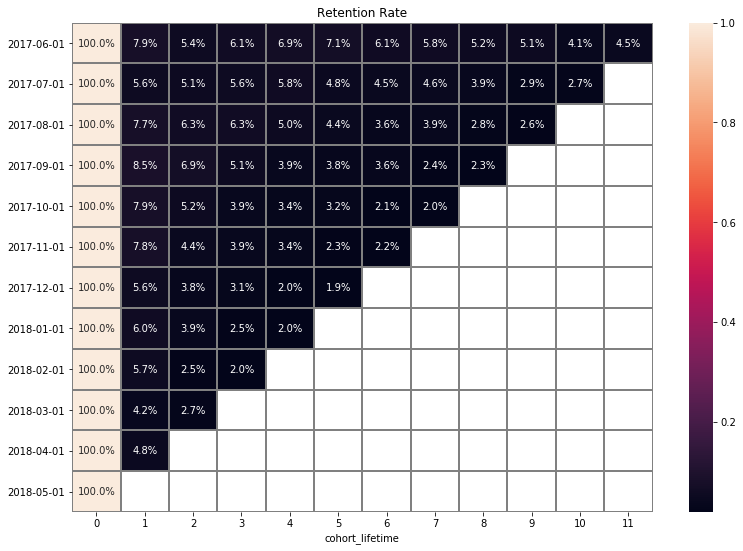

In [39]:
plt.figure(figsize=(13, 9))
retention_pivot.index = retention_pivot.index.strftime('%Y-%m-%d')
plt.title('Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

In [40]:
cohorts_retention_mean = cohorts.groupby('cohort_lifetime').agg({'retention': 'mean'})
cohorts_retention_mean.head(12)

,retention
cohort_lifetime,
0,1.000000
1,0.065167
2,0.046333
3,0.042760
4,0.040595
5,0.039444
6,0.036957
7,0.037509
8,0.035465


Итак, имеем :
1. 100% возврат посетителей в первый месяц - тут все понятно - пришел/увидел/посоветовался-согласовался/вернулся и купил
2. Начиная с сентября показатель возврата падает
3. В летние месяцы показатель колеблется - то растет , то падает
4. В любом случае показатель возврата на сайт очень мал. Нужно возвращать аудиторию.

<a id='2.1.5-bullet'></a>

<a id='2.2-bullet'></a>

##### Выводы по продуктовым метрикам
1. Количество заказов в неделю больше, чем в месяц - значит наш сервис закрывает срочные запросы пользователей - это похвально. Здесь бы еще знать\рассмотреть портрет потребителя, чтобы понять такое поведение. Получается, что никто нынче не планирует заблаговременно культруный досуг - потребность закрывается в рамках 1 недели.
2. Пик покупок конец ноября: "Черная пятница, ты ли это?"
3. Активность покупателей заметна в холодные месяцы - с сентября по апрель - сюда же можно приписать не только отсутсивие приемлимой погоды в большинстве географий нашей страны, но и активный культурный досуг школьников, например.
4. Посещает один гость страницы сервиса чуть более раза в день в среднем - пришел-увидел-вышел-полумал-вернулся-купил 
5. В среднем покупатель на сервисе 10 минут, чащу всего 1 минуту - зашел-нашел\не нашел-купил\ушел

#### 2.2. Метрики электронной коммерции

<a id='2.2.1-bullet'></a>

##### 2.2.1. Расчет времени от первого захода на сайт до совершения покупки

Найдем дату первого заказа  и добавим этот столбец к нашим данным в таблице orders

In [41]:
first_order = orders.groupby('uid')['buy ts'].min()
first_order.name = 'first_order'
orders = orders.join(first_order, on='uid')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
buy ts         50415 non-null datetime64[ns]
revenue        50415 non-null float64
uid            50415 non-null uint64
first_order    50415 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.5 MB


Соединим данные в таблицах с визитами и заказами -  
 оставим только данные о пользователях и непостредственно сами даты

In [42]:
orders_new = pd.merge(first_visit,first_order,on='uid').reset_index()
orders_new.head()

,uid,first_visit,first_order
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


Посчитаем разницу между датами и наглядно выведем на экран 

In [43]:
orders_new['time_visit_order'] = (orders_new['first_order'] - orders_new['first_visit']).dt.seconds
orders_new.head()

,uid,first_visit,first_order,time_visit_order
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,82920
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,4740
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,71040
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


In [44]:
orders_new['time_visit_order'].describe()

count    36523.000000
mean     14949.881445
std      25784.567076
min          0.000000
25%        240.000000
50%        960.000000
75%      15120.000000
max      86340.000000
Name: time_visit_order, dtype: float64

Получается, что с момента 1 визита на сайт до совершения целевого действия  
 у нас проходит в среднем чуть больше 4х часов

<function matplotlib.pyplot.show(*args, **kw)>

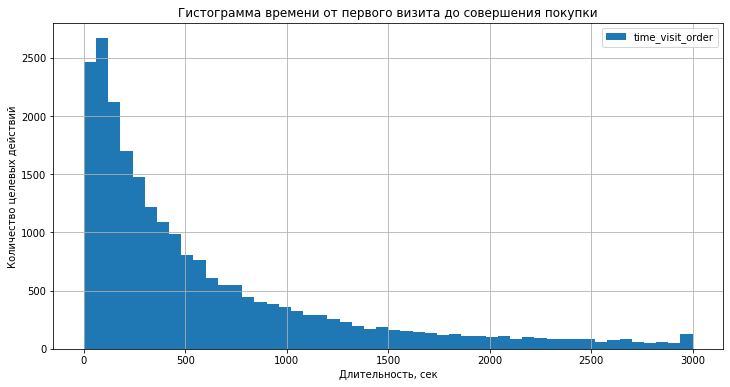

In [45]:
orders_new.plot(y='time_visit_order', kind='hist', bins=50, grid=True, figsize=(12, 6), range = (0, 3000))
plt.title('Гистограмма времени от первого визита до совершения покупки')
plt.xlabel('Длительность, сек')
plt.ylabel('Количество целевых действий');
plt.show

По графику же видим, что больше значений где-то в районе 4х минут

<a id='2.2.2-bullet'></a>

##### 2.2.2. Когортный анализ. Расчет количества покупок за определенный период

Добавим столбцы с месяцем заказа и первым месяцем заказа

In [46]:
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
orders.head()

,buy ts,revenue,uid,first_order,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


Определим сколько людей совершили покупку впервые в каждом месяце

In [47]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [48]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Добавим месяц первого заказа в датафрейм к покупкам

In [49]:
orders_first_month = pd.merge(orders, first_orders, on='uid')
orders_first_month.columns = ['buy ts', 'revenue', 'uid', 'first_order', 'order_month', 'first_order_month', 'no_name'] 
orders_first_month.head()

,buy ts,revenue,uid,first_order,order_month,first_order_month,no_name
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01


Сгруппируем заказы в когорты и объединим с таблицей с данными по посетителям

In [50]:
cohorts = orders_first_month.groupby(['first_order_month', 'order_month']).agg({'revenue':['sum','count']}).reset_index()
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'n_orders']
cohorts.head()

,first_order_month,order_month,revenue,n_orders
0,2017-06-01,2017-06-01,9557.49,2354
1,2017-06-01,2017-07-01,981.82,177
2,2017-06-01,2017-08-01,885.34,174
3,2017-06-01,2017-09-01,1931.30,226
4,2017-06-01,2017-10-01,2068.58,292


Сведем данные по посетителям и по когортам

In [51]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head(10)

,first_order_month,n_buyers,order_month,revenue,n_orders
0,2017-06-01,2023,2017-06-01,9557.49,2354
1,2017-06-01,2023,2017-07-01,981.82,177
2,2017-06-01,2023,2017-08-01,885.34,174
3,2017-06-01,2023,2017-09-01,1931.30,226
4,2017-06-01,2023,2017-10-01,2068.58,292
5,2017-06-01,2023,2017-11-01,1487.92,218
6,2017-06-01,2023,2017-12-01,1922.74,276
7,2017-06-01,2023,2018-01-01,1176.56,174
8,2017-06-01,2023,2018-02-01,1119.15,212
9,2017-06-01,2023,2018-03-01,1225.51,153


In [52]:
report.duplicated().sum()

0

Добавим возраст когорты 

In [53]:
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head() 

,first_order_month,n_buyers,order_month,revenue,n_orders,age
0,2017-06-01,2023,2017-06-01,9557.49,2354,0
1,2017-06-01,2023,2017-07-01,981.82,177,1
2,2017-06-01,2023,2017-08-01,885.34,174,2
3,2017-06-01,2023,2017-09-01,1931.30,226,3
4,2017-06-01,2023,2017-10-01,2068.58,292,4


In [54]:
report['order_per_buyers'] = (report['n_orders'] / report['n_buyers'])
report.head()

,first_order_month,n_buyers,order_month,revenue,n_orders,age,order_per_buyers
0,2017-06-01,2023,2017-06-01,9557.49,2354,0,1.163618
1,2017-06-01,2023,2017-07-01,981.82,177,1,0.087494
2,2017-06-01,2023,2017-08-01,885.34,174,2,0.086011
3,2017-06-01,2023,2017-09-01,1931.30,226,3,0.111715
4,2017-06-01,2023,2017-10-01,2068.58,292,4,0.144340


In [55]:
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='order_per_buyers', 
        aggfunc='mean').cumsum(axis=1).copy().round(2) 
    
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


In [56]:
output[5].sum()

10.049999999999999

Таким образом вычислили, что в среднем за 6 месяцев 1 покупатель совершает 10 покупок.

<a id='2.2.3-bullet'></a>

##### 2.2.3. Расчет средней выручки с пользователя

In [57]:
revenue_per_buyers = orders.groupby('revenue').agg({'uid': 'sum'})
revenue_per_buyers.describe()

,uid
count,1.149000e+03
mean,3.992026e+20
std,1.830718e+21
min,2.551853e+15
25%,9.096467e+18
50%,2.002053e+19
75%,8.439763e+19
max,2.360195e+22


Получаем , что с одного посетителя у нас есть выручка в почти 4 у.е.

<a id='2.2.4-bullet'></a>

##### 2.2.4. Расчет изменения во времени LTV по когортам

Так как маржинальность у нас равна 100% ,то валовая прибыль по формуле равна прибыли.  
 Посчитаем LTV по когортам и составим сводную таблицу, чтобы увидеть данные

In [58]:
report['ltv'] = report['revenue'] / report['n_buyers']
result = report.pivot_table(index='first_order_month',
                           columns='age',
                           values='ltv',
                           aggfunc='mean').cumsum(axis=1).round(2)
result.fillna('')


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


In [59]:
result_ltv_mean = report.groupby('age').agg({'ltv': 'mean'})
result_ltv_mean.head()

,ltv
age,
0,4.801682
1,0.455547
2,0.405498
3,0.827223
4,0.346141


In [60]:
m6_cum_ltv = result.mean(axis=0)[5]
print(m6_cum_ltv)

7.970000000000001


Получаем средний LTV 7,97 у.е. у посетителей с когорт "проживших" 6 месяцев.  
 Много это или мало - узнаем в следующих пунктах

Итак, по расчетам метрик электронной коммерции выводы следующие:

1. Принятие решения о покупке в среднем занимает 4 минуты
2. Если смотреть в разрезе 6 месяцев, то один покупатель совершает в среднем 10 покупок 
3. Один пользователе в среднем приносит прибыль сервису в 4 у.е.
4. За 6 месяц нахождения посетителя на сервисе получаем прибыль в среднем 7,97 у.е.

<a id='2.4.5-bullet'></a>

<a id='2.2.5-bullet'></a>

##### Выводы по метрикам электронной коммерции
1. С момента визита, до совершения целевого действия 4 часа, чаще 4 минуты
2. За 6 месяцев покупатель делает 10 покупок в среднем 
3. Выручка с одного покупателя в среднем 4 у.е. 
4. За 6 месяцев один покупатель приносит сервису 7,97 у.е. в среднем - думаю столь не большой перепад связан с тем, что порой есть акции - типа "киновторник", когда китотеатры устанавливают очень низкие цены на билеты

#### 2.3. Маркетинговые метрики

Рассчитаем и отобразим на графиках, как маркетинговые метрики отличаются по рекламным источникам


<a id='2.3.1-bullet'></a>

##### 2.3.1. Расчет  затрат на маркетинг

Посмотрим суммарные затраты на маркетинг

In [61]:
costs['costs'].sum()

329131.62

329131 у.е. за весь рассматриваемый период.  
 Посмотрим как траты распределены по времени

In [62]:
costs['dt'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-01,62.25
2,1,2017-06-01,36.53
3,1,2017-06-01,55.00
4,1,2017-06-01,57.08


Сгруппируем данные по месяцам и по источникам. Отобразим данные на тепловой карте.

In [63]:
costs_pivot = costs.pivot_table(index='dt',
                           columns='source_id',
                           values='costs',
                           aggfunc='sum')
costs_pivot.index = costs_pivot.index.strftime('%Y-%m-%d')
costs_pivot.head()

source_id,1,2,3,4,5,9,10
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24


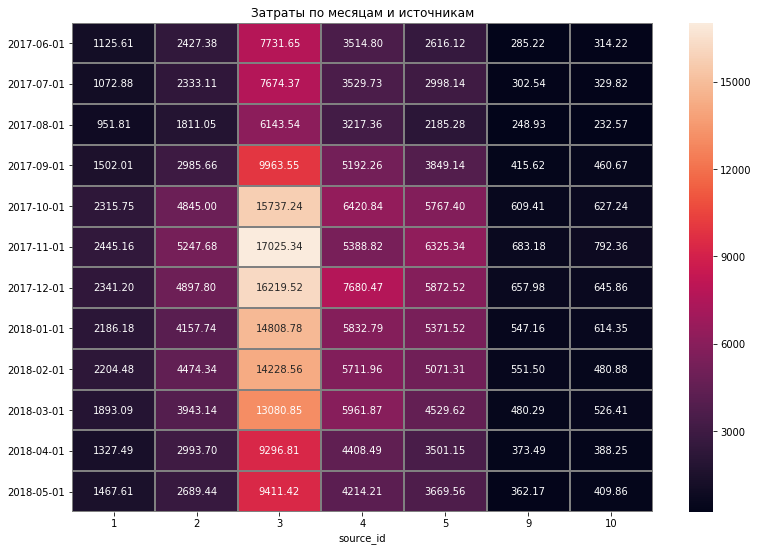

In [64]:
plt.figure(figsize=(13, 9))
plt.title('Затраты по месяцам и источникам')
sns.heatmap(costs_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

По данным тепловой карты мы видим, что:
1. Самый дорогостоящий источник 3 
2. Самые менее затратные источники трафика 1, 9, 10
3. Стомость у всех источников повышается в пиковые месяцы продаж с сентября по апрель
4. Всего у нас 7 источников трафика

<a id='2.3.2-bullet'></a>

##### 2.3.2. Расчет CAC

Найдем первые источники для каждого покупателя

In [65]:
visits_uniq = visits.groupby('uid').agg({'source_id': 'first',
                                         'start ts': 'min'})
visits_uniq['first_visit_month'] = visits_uniq['start ts']\
    .astype('datetime64[M]')

Объединим данные по визитами заказам

In [66]:
source_orders = orders.merge(visits_uniq, on='uid')
source_orders.head()

,buy ts,revenue,uid,first_order,order_month,first_order_month,source_id,start ts,first_visit_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,1,2017-06-01 00:09:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2,2017-06-01 00:14:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2,2017-06-01 00:25:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2,2017-06-01 00:14:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,3,2017-06-01 07:31:00,2017-06-01


In [67]:
source_orders = source_orders.merge(first_orders, on='uid')
source_orders.head()

,buy ts,revenue,uid,first_order,order_month,first_order_month_x,source_id,start ts,first_visit_month,first_order_month_y
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,1,2017-06-01 00:09:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2,2017-06-01 00:14:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2,2017-06-01 00:25:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2,2017-06-01 00:14:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,3,2017-06-01 07:31:00,2017-06-01,2017-06-01


Найдем количество уникальных покупателей для каждого источника

In [68]:
source_groupes = (source_orders
                  .groupby(['first_order_month_x', 'order_month',
                            'source_id'])
                  .agg({'uid': 'nunique'})
                  .reset_index()
                 )
source_groupes.columns = ['first_order_month_x', 
                          'order_month', 'source_id', 'n_users']
source_groupes.head()

,first_order_month_x,order_month,source_id,n_users
0,2017-06-01,2017-06-01,1,203
1,2017-06-01,2017-06-01,2,271
2,2017-06-01,2017-06-01,3,574
3,2017-06-01,2017-06-01,4,417
4,2017-06-01,2017-06-01,5,368


Посчитаем выручку с с каждого покупателя по источникам трафика 

In [69]:
new_source_orders = (source_orders
                     .groupby(['first_order_month_x', 'source_id', 'order_month'])
                     .agg({'revenue':'sum'})
                    )
new_source_orders = (new_source_orders
                     .merge(source_groupes, 
                            on=['first_order_month_x', 'source_id','order_month'])
                    )
new_source_orders.head()

,first_order_month_x,source_id,order_month,revenue,n_users
0,2017-06-01,1,2017-06-01,1168.45,203
1,2017-06-01,1,2017-07-01,362.94,11
2,2017-06-01,1,2017-08-01,153.72,10
3,2017-06-01,1,2017-09-01,695.88,13
4,2017-06-01,1,2017-10-01,760.74,14


Посчитаем затраты на маркетинг в разрезе источников трафика 

In [70]:
monthly_source = costs.groupby(['source_id', 'dt']).agg({'costs':'sum'})
report_source = new_source_orders.merge(monthly_source, left_on=[
                                        'first_order_month_x', 'source_id'],
                                        right_on=['dt', 'source_id'])
report_source.head()


,first_order_month_x,source_id,order_month,revenue,n_users,costs
0,2017-06-01,1,2017-06-01,1168.45,203,1125.61
1,2017-06-01,1,2017-07-01,362.94,11,1125.61
2,2017-06-01,1,2017-08-01,153.72,10,1125.61
3,2017-06-01,1,2017-09-01,695.88,13,1125.61
4,2017-06-01,1,2017-10-01,760.74,14,1125.61


In [71]:
source_buyers = (source_orders
                 .groupby([ 'source_id','first_order_month_x'])
                 .agg({'uid': 'nunique'})
                 .reset_index()
                )
source_buyers.columns = ['source_id', 'first_order_month_x','n_buyers']
report_source = (report_source
                 .merge(source_buyers, on = ['source_id', 'first_order_month_x'])
                )

Добавим столбец с возрастом когорты

In [72]:
report_source['age'] = (report_source['order_month']\
                        - report_source['first_order_month_x'])\
                        / np.timedelta64(1, 'M')
report_source['age'] = report_source['age'].round().astype('int')
report_source.head()

,first_order_month_x,source_id,order_month,revenue,n_users,costs,n_buyers,age
0,2017-06-01,1,2017-06-01,1168.45,203,1125.61,203,0
1,2017-06-01,1,2017-07-01,362.94,11,1125.61,203,1
2,2017-06-01,1,2017-08-01,153.72,10,1125.61,203,2
3,2017-06-01,1,2017-09-01,695.88,13,1125.61,203,3
4,2017-06-01,1,2017-10-01,760.74,14,1125.61,203,4


Посчитаем CAC 

In [73]:
report_source['cac'] = report_source['costs'] / report_source['n_buyers']
report_source.head()

,first_order_month_x,source_id,order_month,revenue,n_users,costs,n_buyers,age,cac
0,2017-06-01,1,2017-06-01,1168.45,203,1125.61,203,0,5.544877
1,2017-06-01,1,2017-07-01,362.94,11,1125.61,203,1,5.544877
2,2017-06-01,1,2017-08-01,153.72,10,1125.61,203,2,5.544877
3,2017-06-01,1,2017-09-01,695.88,13,1125.61,203,3,5.544877
4,2017-06-01,1,2017-10-01,760.74,14,1125.61,203,4,5.544877


Посмотрим распределение CAC по источникам трафика

In [74]:
cac_pivot = report_source.pivot_table(index = 'first_order_month_x',
    columns = 'source_id',
    values = 'cac')

cac_pivot.head(10)

source_id,1,2,3,4,5,9,10
first_order_month_x,,,,,,,
2017-06-01,5.544877,8.957122,13.469774,8.428777,7.109022,2.769126,3.611724
2017-07-01,5.084739,9.078249,17.323634,7.233053,7.439553,4.033867,7.170000
2017-08-01,6.564207,11.836928,21.184621,9.779210,6.602054,2.963452,6.285676
2017-09-01,5.307456,9.600193,15.399614,8.906106,6.579726,3.996346,6.774559
2017-10-01,5.661980,9.728916,15.219768,5.805461,6.214871,3.502356,3.283979
2017-11-01,5.409646,10.169922,16.545520,4.790062,9.627610,3.614709,7.012035
2017-12-01,5.111790,9.584736,14.202732,5.958472,7.946576,3.987758,8.175443
2018-01-01,6.487181,12.121691,17.483802,5.832790,8.302195,4.885357,7.061494
2018-02-01,6.389797,11.805646,14.638436,5.486993,7.546592,4.754310,3.816508


In [75]:
cac_pivot = report_source.pivot_table(index='first_order_month_x',
                                    columns='age',
                                    values='cac',
                                    aggfunc='mean')
cac_pivot = cac_pivot.cumsum(axis=1).round(2)

mean_cac = cac_pivot.mean(axis=0).round(2)
mean_cac.name = 'mean_cac'

cac_pivot = cac_pivot.append(mean_cac)
formatted_dates_cac = list(cac_pivot.index.to_series()[:-1].dt.strftime('%Y-%m'))
cac_pivot.index = formatted_dates_cac + ['mean_cac']
display(cac_pivot.fillna(''))

age,0,1,2,3,4,5,6,7,8,9,10,11
2017-06,7.13,14.25,21.97,29.68,36.81,44.52,52.23,59.95,67.07,74.79,82.5,90.35
2017-07,8.19,16.39,24.75,32.95,41.32,49.68,58.05,66.41,74.78,84.01,92.37,
2017-08,9.32,18.63,27.95,37.77,47.59,57.42,66.73,76.05,85.87,95.69,,
2017-09,8.08,16.16,24.24,32.32,40.4,49.16,57.24,66.01,74.09,,,
2017-10,7.06,14.12,21.18,28.24,35.3,42.99,50.05,57.74,,,,
2017-11,8.17,16.33,24.5,32.67,40.84,49,57.17,,,,,
2017-12,7.85,15.65,23.5,31.3,39.1,46.95,,,,,,
2018-01,8.88,17.76,26.95,36.14,45.32,,,,,,,
2018-02,7.78,15.55,23.33,31.77,,,,,,,,
2018-03,7.20,14.41,21.61,,,,,,,,,


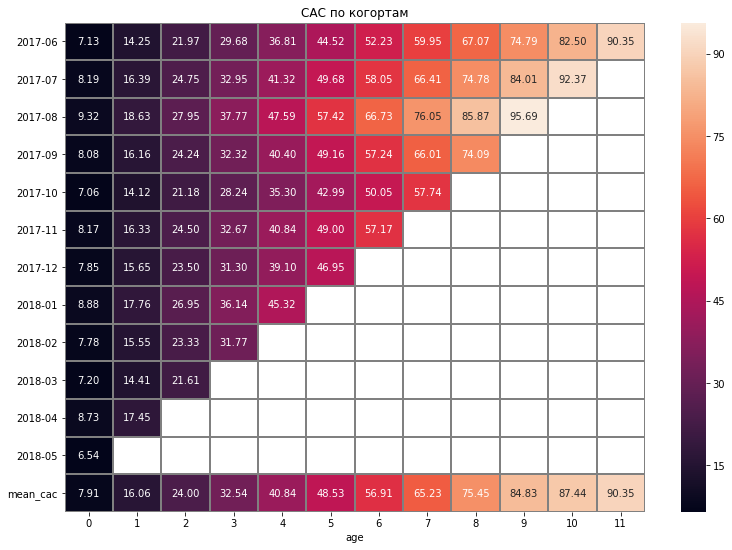

In [76]:
plt.figure(figsize=(13, 9))
#cac_pivot.index = cac_pivot.index.strftime('%Y-%m-%d')
plt.title('CAC по когортам')
sns.heatmap(cac_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

Посмотрим средние значения CAC  по источникам трафика 

In [77]:
cac_pivot = report_source.pivot_table(index='source_id',
                           values='cac').cumsum(axis=1).round(2)
cac_pivot.fillna('')

,cac
source_id,
1,5.64
2,10.09
3,16.22
4,7.20
5,7.39
9,3.77
10,5.51


Рассчитав стоимость привлечения клиента в разрезе источников трафика и по когортам, видим :
1. Самый дорогой клиент приходит с источника №3 - здесь САС = 16,22
2. Самый бюджетный клиент приходит с источника №9 CAC = 3,77
3. С течением времени возрастают показатели CAC

<a id='2.3.3-bullet'></a>

##### 2.3.3. Расчет ROMI

In [78]:
report_source['ltv'] = report_source['revenue'] / report_source['n_buyers']
report_source['romi'] = report_source['ltv'] / report_source['cac']
report_source.head()

,first_order_month_x,source_id,order_month,revenue,n_users,costs,n_buyers,age,cac,ltv,romi
0,2017-06-01,1,2017-06-01,1168.45,203,1125.61,203,0,5.544877,5.755911,1.038059
1,2017-06-01,1,2017-07-01,362.94,11,1125.61,203,1,5.544877,1.787882,0.322439
2,2017-06-01,1,2017-08-01,153.72,10,1125.61,203,2,5.544877,0.757241,0.136566
3,2017-06-01,1,2017-09-01,695.88,13,1125.61,203,3,5.544877,3.427980,0.618225
4,2017-06-01,1,2017-10-01,760.74,14,1125.61,203,4,5.544877,3.747488,0.675847


Посмотрим ROMI по когортам 

In [79]:
monthly_costs = costs.groupby('dt')['costs'].sum()

Сделаем новую таблицу для CAC и ROMI

In [80]:
new_report = pd.merge(report, monthly_costs, left_on='first_order_month',
                      right_on='dt')
new_report['cac'] = new_report['costs'] / new_report['n_buyers']
new_report['romi'] = new_report['ltv'] / new_report['cac']

new_report.head()

,first_order_month,n_buyers,order_month,revenue,n_orders,age,order_per_buyers,ltv,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,2354,0,1.163618,4.724414,18015.0,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,177,1,0.087494,0.485329,18015.0,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,174,2,0.086011,0.437637,18015.0,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,226,3,0.111715,0.954671,18015.0,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,292,4,0.144340,1.022531,18015.0,8.905091,0.114825


In [81]:
romi_pivot = new_report.pivot_table(index='first_order_month',
                                    columns='age',
                                    values='romi',
                                    aggfunc='mean')
romi_pivot = romi_pivot.cumsum(axis=1).round(2)

mean_romi = romi_pivot.mean(axis=0).round(2)
mean_romi.name = 'mean_romi'

romi_pivot = romi_pivot.append(mean_romi)
formatted_dates_romi = list(romi_pivot.index.to_series()[:-1].dt.strftime('%Y-%m'))
romi_pivot.index = formatted_dates_romi + ['mean_romi']
display(romi_pivot.fillna(''))

age,0,1,2,3,4,5,6,7,8,9,10,11
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02,0.46,0.49,0.5,0.51,,,,,,,,
2018-03,0.56,0.6,0.63,,,,,,,,,


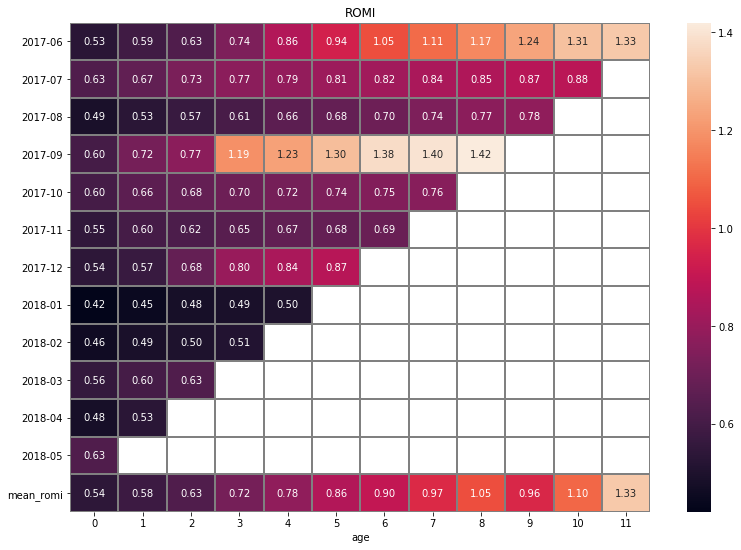

In [82]:
plt.figure(figsize=(13, 9))
#romi_pivot.index = romi_pivot.index.strftime('%Y-%m-%d')
plt.title('ROMI')
sns.heatmap(romi_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

Посмотрим на окупаемость ROMI по источникам трафика

In [83]:
report_source.head()

,first_order_month_x,source_id,order_month,revenue,n_users,costs,n_buyers,age,cac,ltv,romi
0,2017-06-01,1,2017-06-01,1168.45,203,1125.61,203,0,5.544877,5.755911,1.038059
1,2017-06-01,1,2017-07-01,362.94,11,1125.61,203,1,5.544877,1.787882,0.322439
2,2017-06-01,1,2017-08-01,153.72,10,1125.61,203,2,5.544877,0.757241,0.136566
3,2017-06-01,1,2017-09-01,695.88,13,1125.61,203,3,5.544877,3.427980,0.618225
4,2017-06-01,1,2017-10-01,760.74,14,1125.61,203,4,5.544877,3.747488,0.675847


In [84]:
source={}
for i in report_source['source_id'].unique():
    romi = report_source.query('source_id == @i').pivot_table(
        index='first_order_month_x',
        columns='age',
        values = 'romi',
        aggfunc = 'mean'
    )
    source[i] = romi.cumsum(axis=1).mean(axis=0).to_dict() 
    romi_report = pd.DataFrame(source)
romi_report['mean'] = romi_report.mean(axis=1)

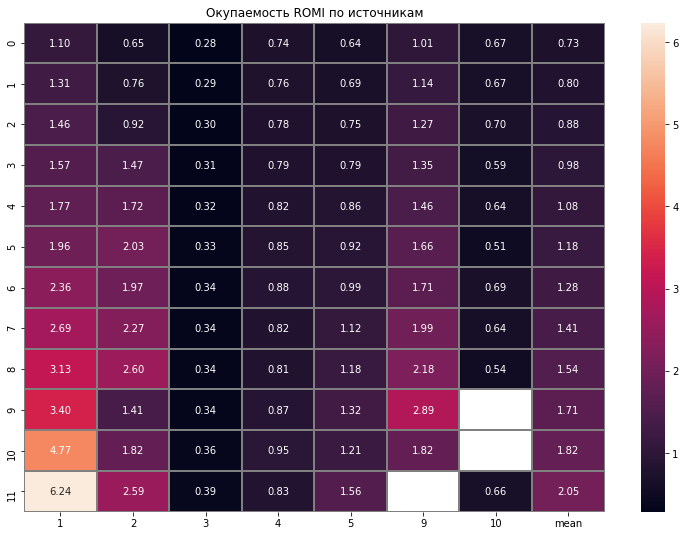

In [85]:
plt.figure(figsize=(13, 9))
plt.title('Окупаемость ROMI по источникам')
sns.heatmap(romi_report, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

По визуализации видим, что: 
1. Больший процент возврата инвестиций , большую и быструю окупаемости демострирует когорта 2017-09
2. Неплохо выглядит и когорта 2017-12 - декабрь, возможно, показатели имеет ниже, так как закупались со скидками клиенты в "черную пятницу" и "кибер-понедельник" 
3. По продолжительности и % окупаемости безусловно лидирует первая когорта 
4. Инвестиции себя оправдывают примерно на 8й месяц когорты - значение больше 1
5. Источники трафика 1,9 показывают хорошие % возврата инвестиций
6. Так как источник трафика 2 один из самых дорогих и имеет хорошие показатели окупаемости - возможно с него не много покупателей, но зато хорошая с них выручка 

<a id='2.3.4-bullet'></a>

##### Выводы по маркетинговым метрикам
1. У нас есть 7 источников трафика 
2. Самый расходно-дорогой 3 
3. По показателям ROMI окупаются 1,2, 9
4. САС , что и следовало ожидать самый высокий у источника №3
5. Инвестиции себя оправдываюк на 8 месяц от старта вложений 

<a id='3-bullet'></a>

### 3. Выводы и рекомендации

Посмотрим каким устройствами чаще пользуются посетители сервиса 

In [86]:
device_pivot = visits.pivot_table(index = 'device', values= 'uid', aggfunc= {'count','nunique'}).reset_index()
device_pivot.head()

,device,count,nunique
0,desktop,262567,164523
1,touch,96833,71345


Ровно на что я обратила внимание в самом начале -  
 действительно, чаще сервисом пользуются с декстопных устройств. Думаю это связано с тем, что при первой покупке на сервисе нужно вносить данные банковской карты, что удобнее делать не с телефона

Если посмотрим на источники трафика, то увидим:
1. Необходимы настройки ремаркетинга, чтобы возвращать уже тех, кто совершил покупки или просто зашел на сайт,  
 так как показатель ретеншена очень низки - мы видим
2. Так же мы вычислили, что источник №3 самый объемный по расходам.  
 Если источник №3 это не имиджевая или нативная реклама - стоит пересмотреть распределение рекламных бюджетов, так как расходы очень приличные, а САС как показатель стоимости привлечения очень высокий - значит поток трафика с этого источника не велик.
3. Самые перспективные источники трафика №1, 9, 10 - CAC низкий, соответсвенно ROMI высокий 

По рассчету метрик мы выяснили, что:
1. Продуктовые метрики нам показали: 
 - Заметен повышенный спрос на услуги сервиса с сентября по апрель, что логично так как  
  тема досуга особенно актуальна в холодное рвемя года
 - На сайт один гость заходит в средненм чуть более раза в день : зашел\увидел\обсудил с партнерами\зашел\купил
 - В среднем на сайте сидят 10 минут, чаще минуту - зашел\купил - так же короткое время на сайте говорит о том, что сервис работает без сбоя 
 - Процент нулевых сессий равен 11, возможно где-то есть реклама,  
  которую трудно убрать (маленький баннер с маленьким крестиком), что приводит к тому , что посетители случайные на сайте 
 - Ретеншн не доходит и до 10% - нужен ремаркетинг, чтобы напоминать недавним посетителям о себе.  
  Самая активно возвращающаяся когорта 2017-06
2. Метрики электронной коммерции говорят:
 - Посетителю в среднем нужно 4 часа на принятие решения о покупке
 - За 6 месяцев наш покупатель вернется. кнам за покупками в среднем 10 раз
 - Одна покупка приносит нам доход в среднем 4 у.е.
 - При когортном расчете получаем доход с одного полкупателя за 6 месяцев 7,97 у.е.
3. Маркетинговые метрики повествуют:
 - Всего у нас 7 источников трафика - самые дорогие 2,3,4,5 - особенно 3. Самые недорогие 1,9,10
 - Если мы имеем доход с 1 покапателя в среднем 4 у.е. - то нам наиболее выгодны источник 9,  
  так как САС там 3.77. То есть покупатели с этих источников приносят нам доход больше , чем мы тратим на их привлечение. Думаю, стоит рассмотреть вариант, чтобы увеличить поток покупателей с этого источника - интересный баннер, перенастроить таргетинг, оформление страницы сайта источника.
 - Показатель ROMI нам говорит, что окупаемость показывают источники 1,2,9

Провели когортный анализ и выяснили, что 
1. Самая многочисленная армия у когорты 2017-12 - что неудивительно так как в декабре велик спрос на новогодние представления и плюс может выпасть акция кибер-понедельник, который идет вслед на черной пятницей(последняя пятница ноября)
2. Больше всего прибыли приносит когорта 2017-06 - так как дольше существует и показывает высокий процент возврата посетителей.  
 Собственно и здесь перенастроить ремаркетинг и будут охотнее возвращаться за покупками.